# XYZeq Primary Analysis

In [28]:
#import necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

import scanpy.api as sc

In [29]:
#designate working directory 
#path should contain: matrix.mtx, plate_map.csv, cell_annotate.txt
#for scanpy annotations: barcodes.tsv, genes.tsv


path="./data/20181219_species_exp_2/"

#get and format the data

array_columns=['gene','cell','count']

count_matrix=pd.read_csv(path + 'matrix.mtx', sep=' ', header=None, index_col=None, skiprows=3, names=array_columns)


#check the format of the data
count_matrix.head()

,gene,cell,count
0,100389,1,1
1,101207,1,1
2,102181,1,1
3,102851,1,2
4,103401,1,1


number of UMIs total: 7881545
number of cells: 8990


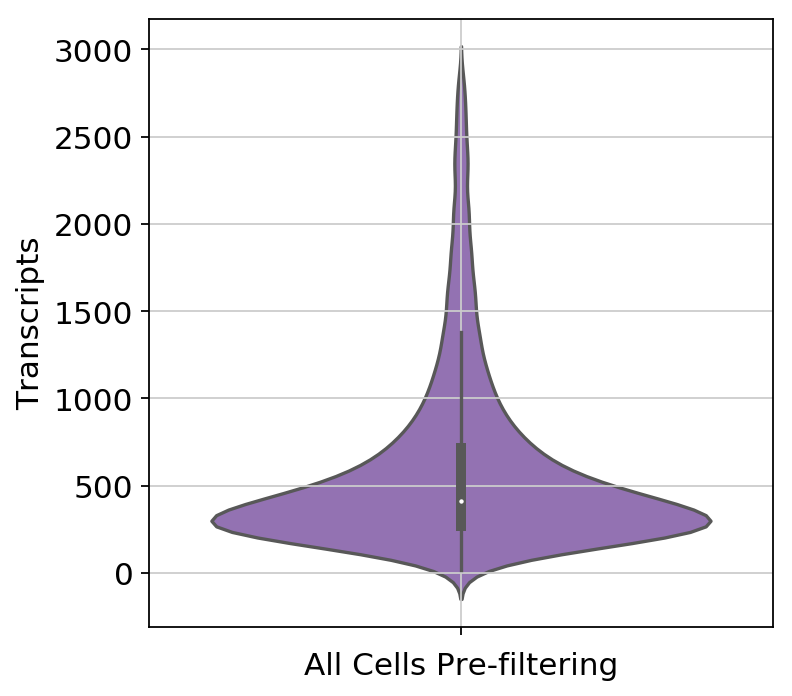

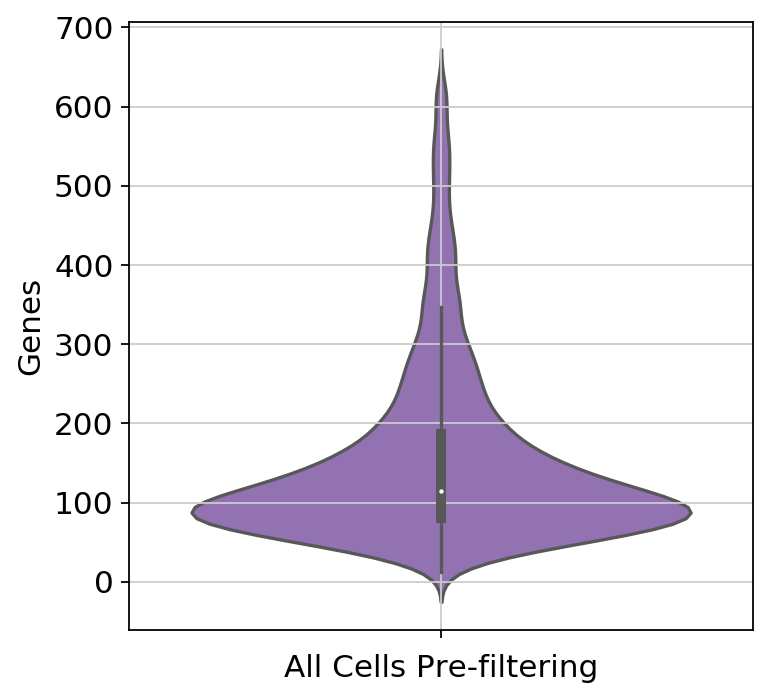

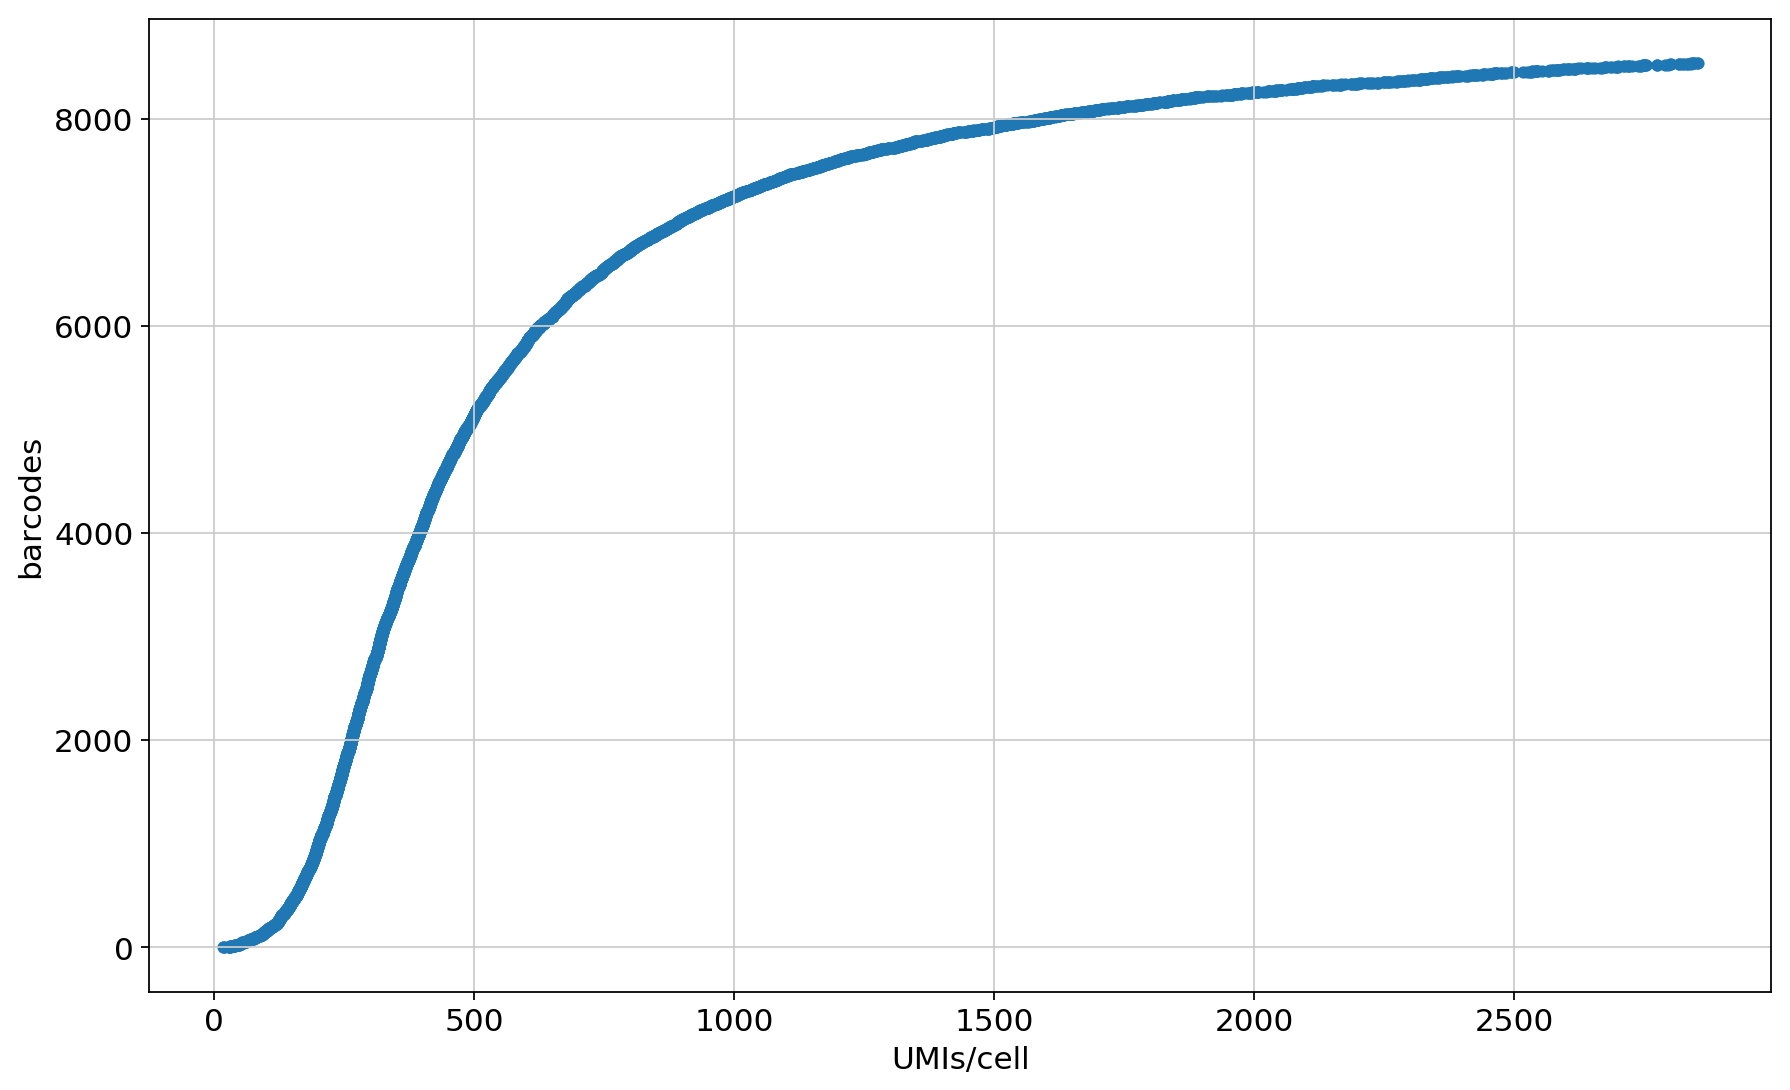

In [30]:
##show some metrics for the data 

total_UMIS=count_matrix['count'].sum()
cell_number=count_matrix['cell'].nunique()


print("number of UMIs total:", total_UMIS)
print("number of cells:", cell_number)

plt.rcParams['figure.figsize'] = [5, 5]

#UMIs per cell
UMIs=count_matrix.groupby('cell')['count'].sum()

q=UMIs.quantile(.95)
UMIs=UMIs[UMIs < q]

ax=sns.violinplot(UMIs, orient='v', color='#9467bd')
ax.set(ylabel='Transcripts', xlabel='All Cells Pre-filtering')
plt.grid(True)
plt.show()

#genes per cell
genes=count_matrix.groupby('cell')['gene'].nunique()

q=genes.quantile(0.95)
genes=genes[genes < q]


ax=sns.violinplot(genes, orient='v', color='#9467bd')
ax.set(ylabel='Genes', xlabel='All Cells Pre-filtering')
plt.grid(True)
plt.show()



#make UMI knee plot

counts=UMIs.reset_index()
counts=counts.sort_values(by=['count'], axis=0, ascending=True)
counts=counts.reset_index()
counts=counts.drop('index',axis=1)
counts=counts.reset_index()
counts.columns=['barcodes','cell','UMIs/cell']
plt.rcParams['figure.figsize'] = [13, 8]
counts.plot.scatter(x='UMIs/cell',y='barcodes')



In [31]:
cd scripts/

/Users/derekbogdanoff/projects/XYZeq/scripts


In [32]:
from hex_spatial_map import plot_spatial_array

In [33]:
import hex_spatial_map

In [34]:
cd ..

/Users/derekbogdanoff/projects/XYZeq


In [35]:
hex_spatial_map.organize_matrix(path+'matrix.mtx', path+'cell_annotate.txt', 
                   path+'gene_name_annotate.txt')
    
    
    
    

,gene,cell,count,barcode,name
0,100389,1,1,GCCTCTTAGATAGACA,mm10_Gfra2
1,101207,1,1,GCCTCTTAGATAGACA,mm10_Aplp2
2,102181,1,1,GCCTCTTAGATAGACA,mm10_Rpl4
3,102851,1,2,GCCTCTTAGATAGACA,mm10_Dzip1l
4,103401,1,1,GCCTCTTAGATAGACA,mm10_Cnot10
5,103959,1,1,GCCTCTTAGATAGACA,mm10_Ehbp1
6,104867,1,1,GCCTCTTAGATAGACA,mm10_Rai1
7,105053,1,1,GCCTCTTAGATAGACA,mm10_Gm12295
8,105667,1,59,GCCTCTTAGATAGACA,mm10_Git1
9,105893,1,32,GCCTCTTAGATAGACA,mm10_Slfn9


In [54]:
cd ..

/Users/derekbogdanoff/projects/XYZeq


## plot spatial UMI counts

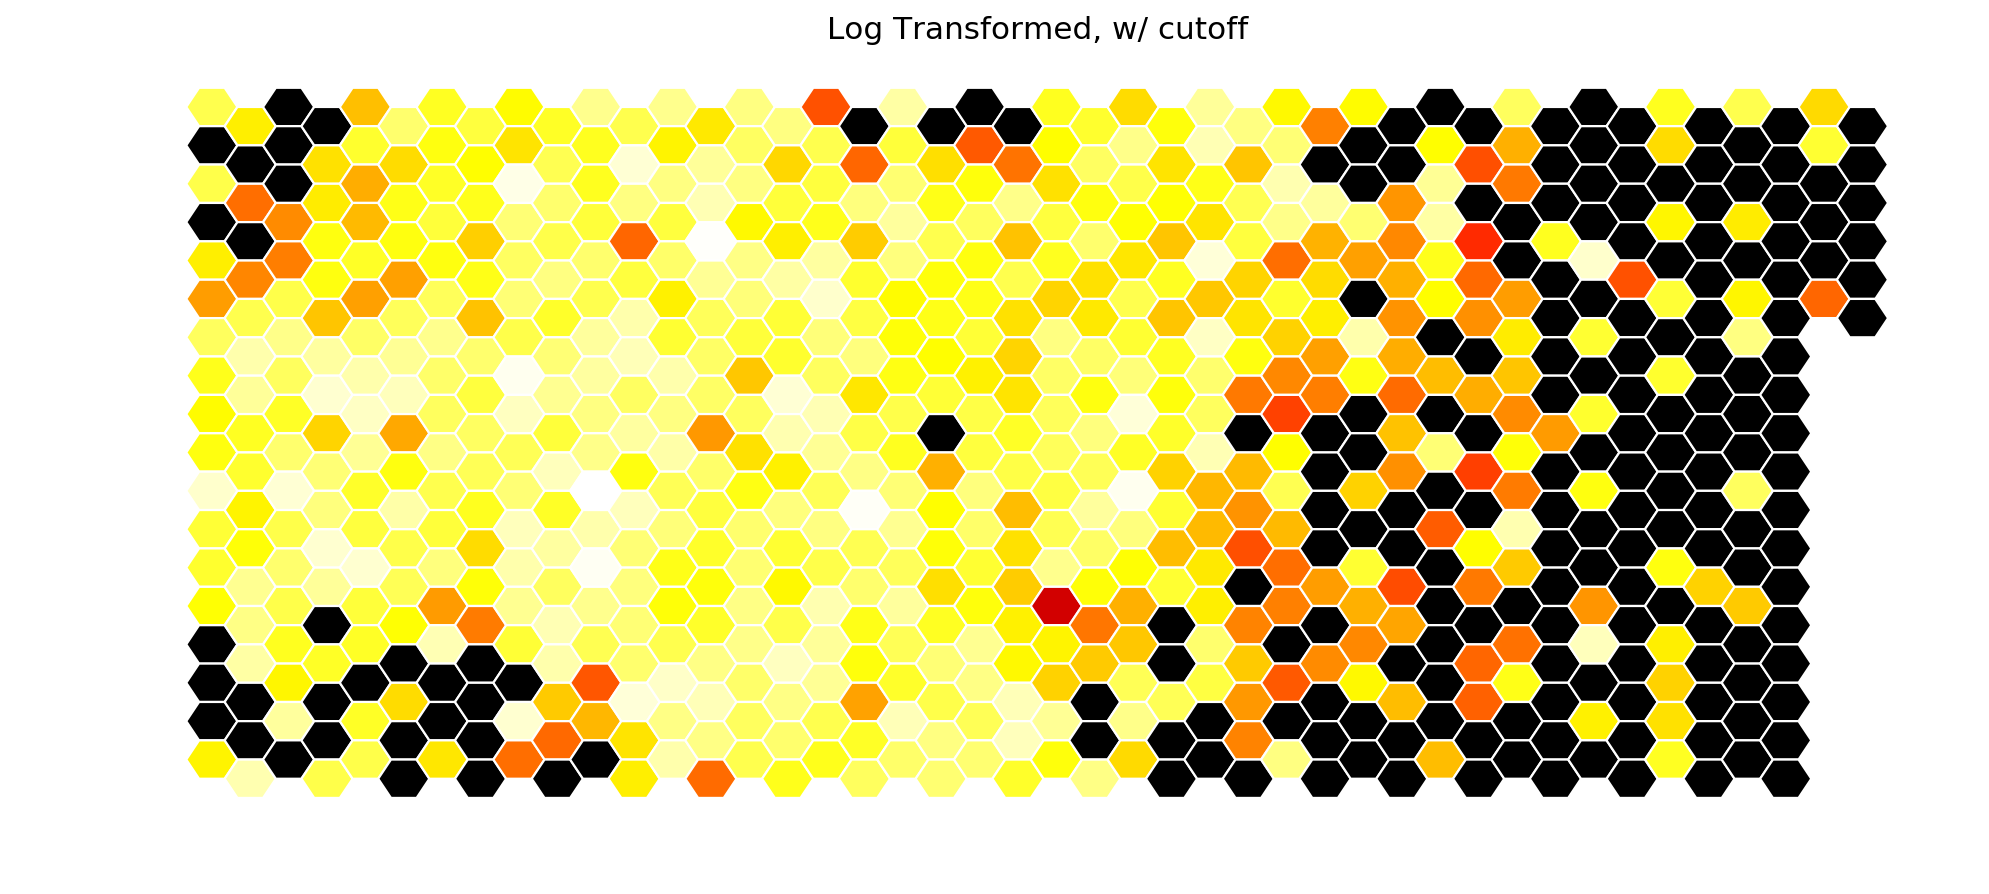

In [36]:
plot_spatial_array(path+'matrix.mtx', path+'cell_annotate.txt', 
                   path+'gene_name_annotate.txt', 
                   path+'plate23_map.csv','UMIS', 0)

## plot spatial counts of marker gene

### mouse cell marker mm10_Malat1

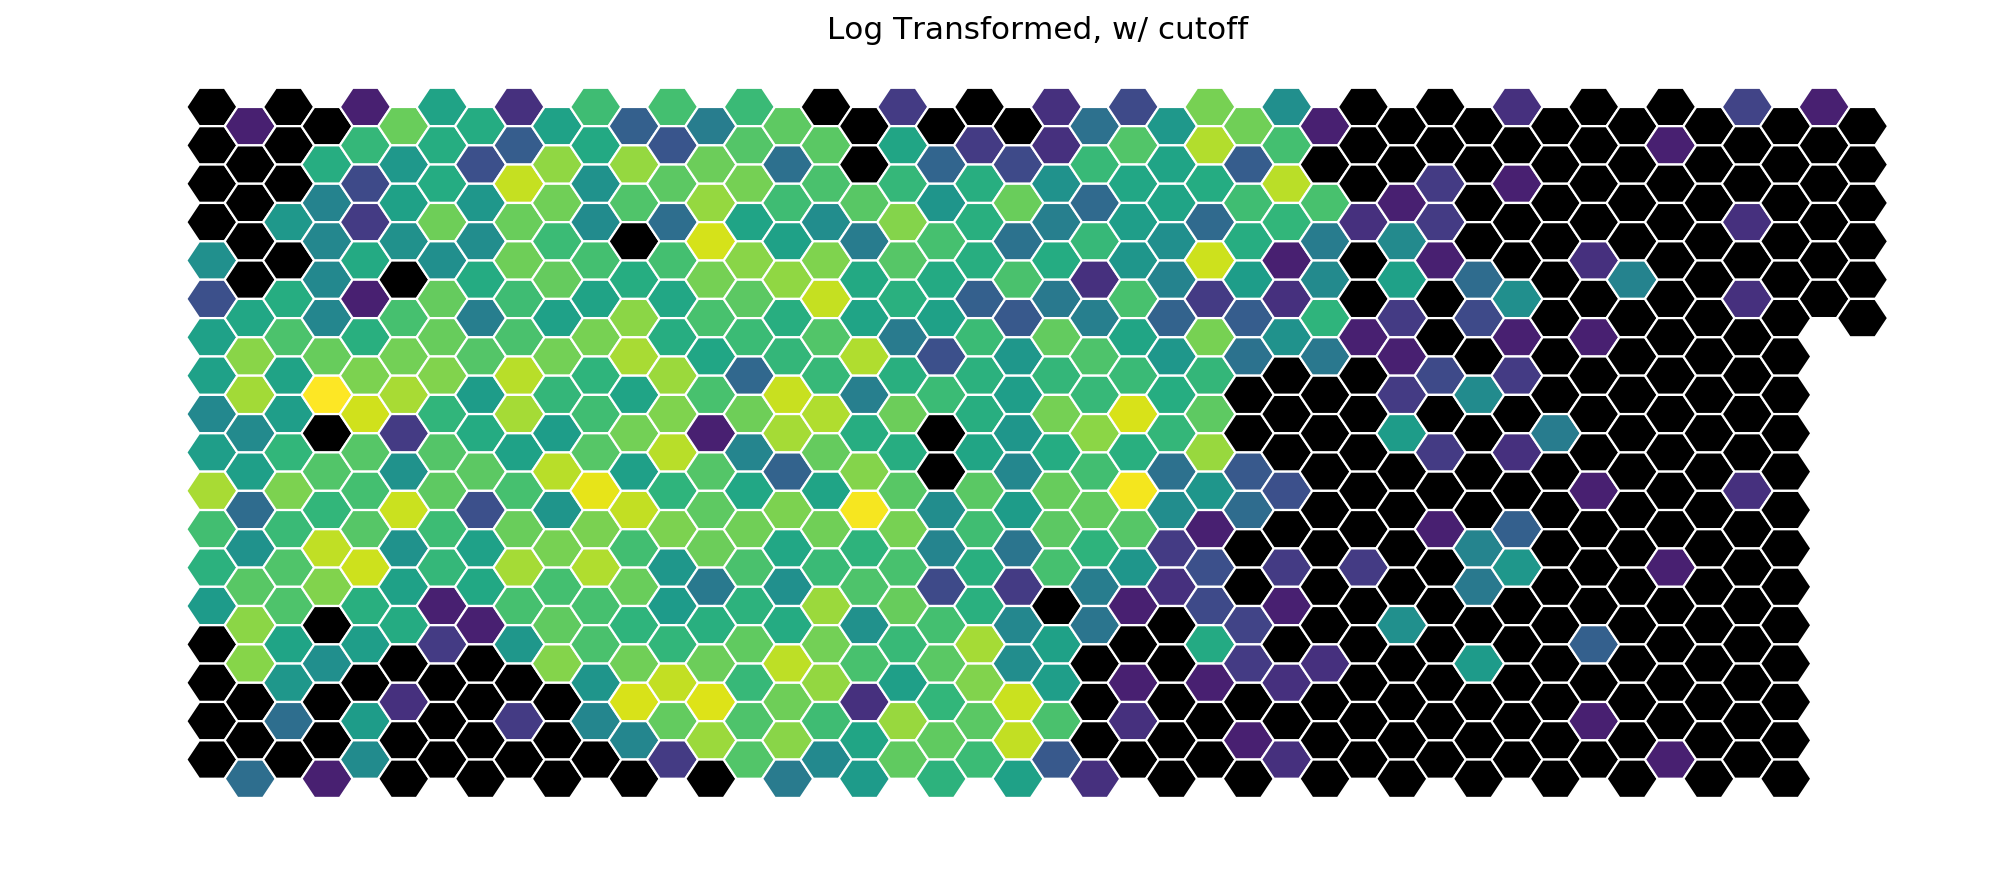

In [37]:
plot_spatial_array(path+'matrix.mtx', path+'cell_annotate.txt', 
                   path+'gene_name_annotate.txt', 
                   path+'plate23_map.csv','mm10_Malat1', 0)

### human cell marker hg19_Malat1

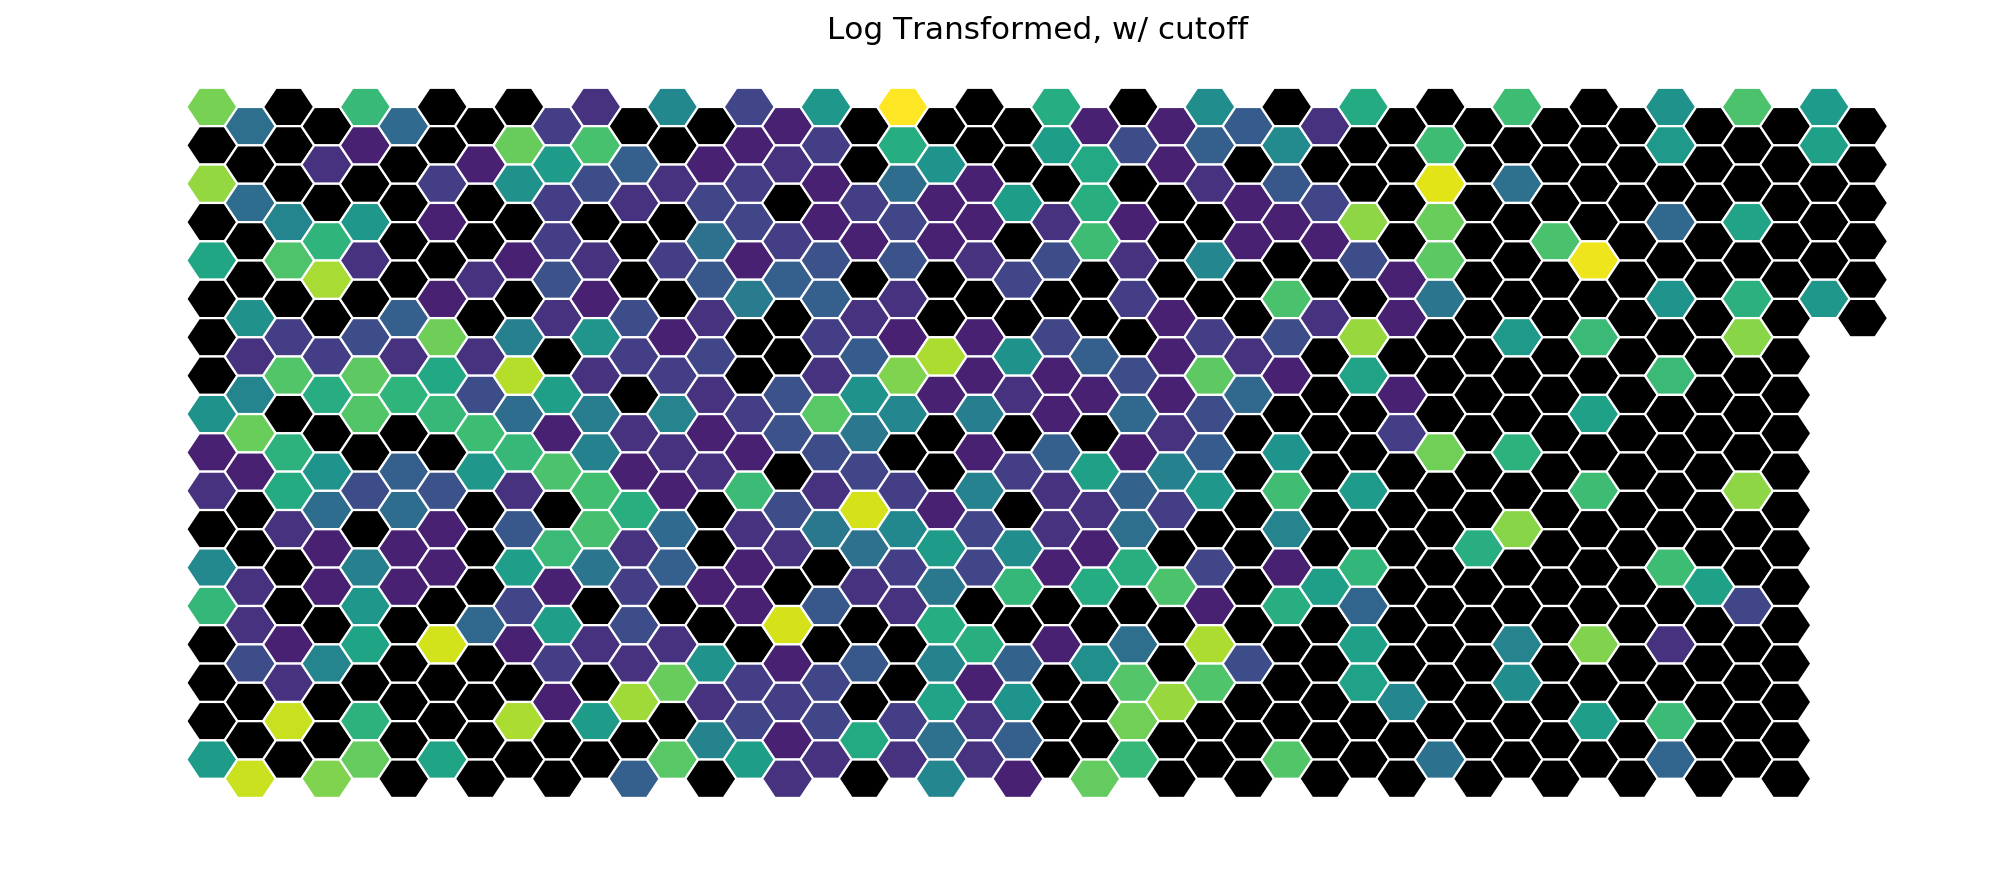

In [38]:
plot_spatial_array(path+'matrix.mtx', path+'cell_annotate.txt', 
                   path+'gene_name_annotate.txt', 
                   path+'plate23_map.csv','hg19_MALAT1', 0)

## run scanpy workflow

In [39]:
##scanpy tsne UMAP

sc.settings.verbosity=3
sc.settings.set_figure_params(dpi=80)
sc.logging.print_versions()
results_file = './write/results.h5ad'

#sc.settings = True

#adata=sc.read('/Users/derekbogdanoff/projects/XYZeq/data/20181219_species_exp_2/matrix.mtx', cache=True).T

adata=sc.read(path + 'matrix.mtx', cache=True).T


##name the genes
adata.var_names = [gene.strip() for gene in open(path + 'genes.tsv', 'r')]


##name the cells
#adata.obs_names = [barcode.strip() for barcode in open(path + 'cell_types.tsv', 'r')] 




scanpy==1.4.3 anndata==0.6.21 umap==0.3.9 numpy==1.14.6 scipy==1.2.2 pandas==0.23.4 scikit-learn==0.20.0 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 
... reading from cache file cache/data-20181219_species_exp_2-matrix.h5ad


In [40]:
adata.var_names_make_unique()

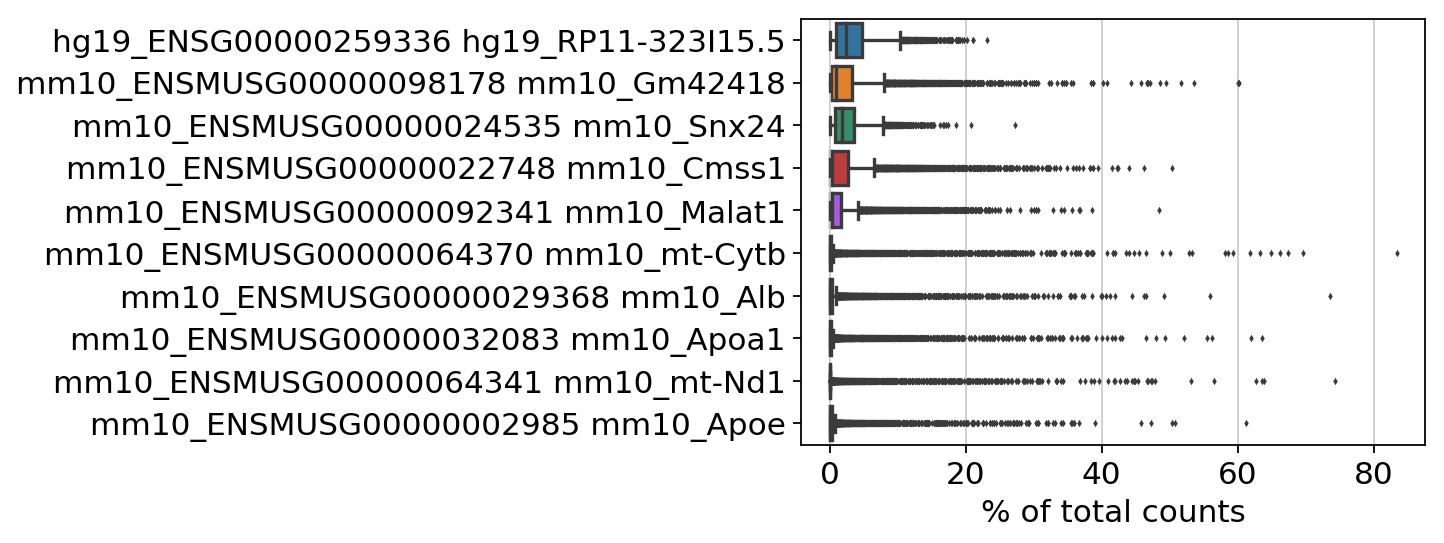

In [41]:
sc.pl.highest_expr_genes(adata, n_top=10) 

In [42]:
##post processing filter minimum UMIS and genes
sc.pp.filter_cells(adata, min_counts=300)#800
sc.pp.filter_cells(adata, min_genes=150) #150

#sc.pp.filter_cells(adata, max_counts=15000)
#sc.pp.filter_cells(adata, max_genes=2000) 

##post processing filter genes 
sc.pp.filter_genes(adata, min_cells=2) #5
#sc.pp.filter_genes(adata, max_cells=500)   



## define mito genes 
mito_genes=[name for name in adata.var_names if name.startswith(('mm10_mt-', 'hg19_mt-', 'mt-'))]



#create new obs anotation to define percent mito for each cell 
adata.obs['percent_mito'] = np.sum(adata[:, mito_genes].X, axis=1) / np.sum(adata.X, axis=1)*100

#create new obs anotation to define UMIs per cell
adata.obs['n_counts'] = adata.X.sum(axis=1)


filtered out 2639 cells that have less than 300 counts
filtered out 2972 cells that have less than 150 genes expressed
filtered out 82978 genes that are detected in less than 2 cells


In [43]:
adata

AnnData object with n_obs × n_vars = 3379 × 38494 
    obs: 'n_counts', 'n_genes', 'percent_mito'
    var: 'n_cells'

In [106]:
##filter based on observation

adata = adata[adata.obs['n_genes'] < 2000, :]
adata = adata[adata.obs['n_counts'] < 20000, :]
adata = adata[adata.obs['percent_mito'] < 10, :]

In [107]:
##create raw data file

adata.raw = sc.pp.log1p(adata, copy=True)

In [108]:
##normalize counts per cell to 10K each 

sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

In [109]:
print(adata.X.sum(axis=1))

[[10000.   ]
 [10000.001]
 [10000.   ]
 ...
 [10000.   ]
 [ 9999.999]
 [10000.   ]]


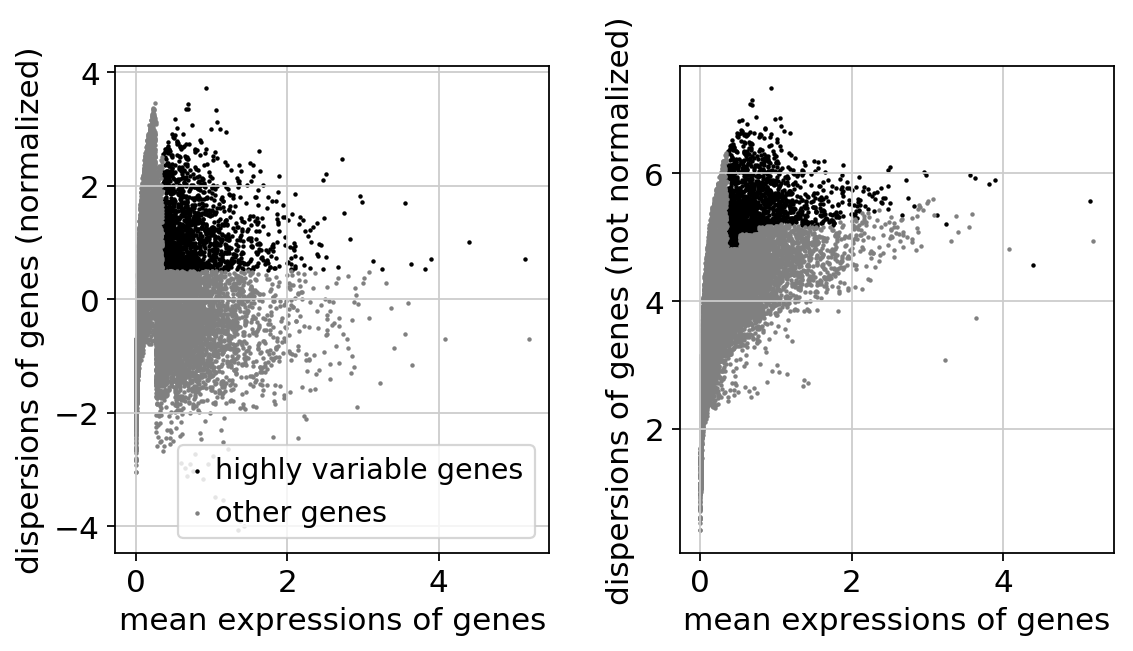

In [110]:
filter_result = sc.pp.filter_genes_dispersion(
    adata.X, min_mean=0.35, max_mean=7, min_disp=.5)
    #adata.X, min_mean=0.0, max_mean=.5, min_disp=1.5)
    
    
sc.pl.filter_genes_dispersion(filter_result)

In [111]:
sum(filter_result.gene_subset)

1547

In [112]:
#percent of genes that are retained
sum(filter_result.gene_subset)/len(filter_result.gene_subset)*100

8.764375956036485

In [113]:
adata = adata[:, filter_result.gene_subset]

In [114]:
#Regress out unwanted sources of variation

sc.pp.regress_out(adata, ['n_counts', 'percent_mito'])

regressing out ['n_counts', 'percent_mito']
    sparse input is densified and may lead to high memory use
    finished (0:00:03.08)


In [115]:
sc.pp.scale(adata, max_value=10)

In [116]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA with n_comps = 50
    finished (0:00:00.21)


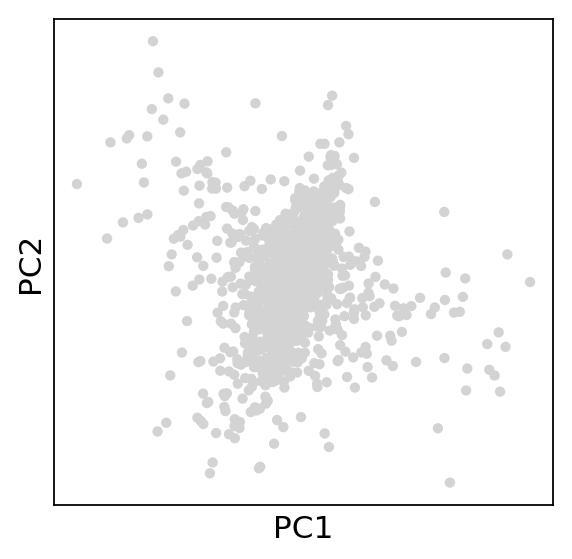

In [117]:
sc.pl.pca(adata)

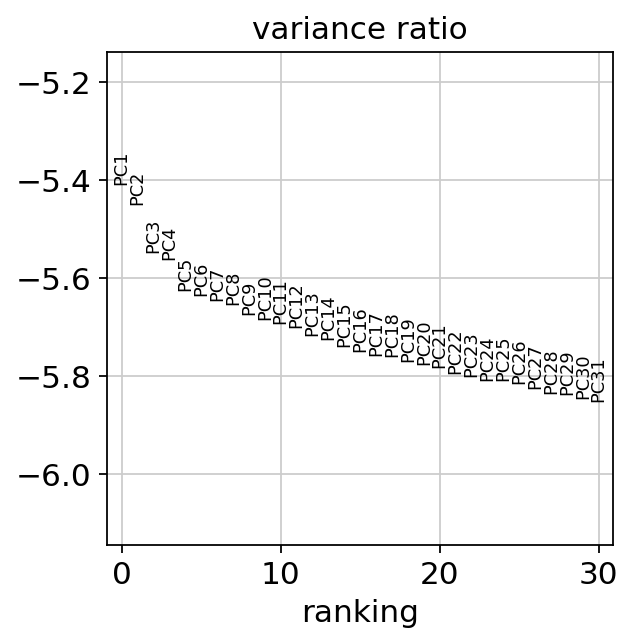

In [118]:
sc.pl.pca_variance_ratio(adata, log=True)

In [119]:
sc.pp.neighbors(adata, n_neighbors=17, n_pcs=8)

computing neighbors
    using 'X_pca' with n_pcs = 8
    finished (0:00:00.07) --> added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix


In [120]:
 sc.tl.louvain(adata, resolution=0.7 )

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.12) --> found 10 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


In [121]:
 sc.tl.leiden(adata, resolution=0.7 )

running Leiden clustering
    finished (0:00:00.39) --> found 10 clusters and added
    'leiden', the cluster labels (adata.obs, categorical)


In [122]:
sc.tl.umap(adata,
           min_dist=.05,
           spread=5,
           alpha=2
           )

computing UMAP
    using 'X_pca' with n_pcs = 8


/Users/derekbogdanoff/projects/venv3/lib/python3.7/site-packages/umap/umap_.py:1054: RuntimeWarning: divide by zero encountered in power
  return 1.0 / (1.0 + a * x ** (2 * b))


    finished (0:00:01.99) --> added
    'X_umap', UMAP coordinates (adata.obsm)


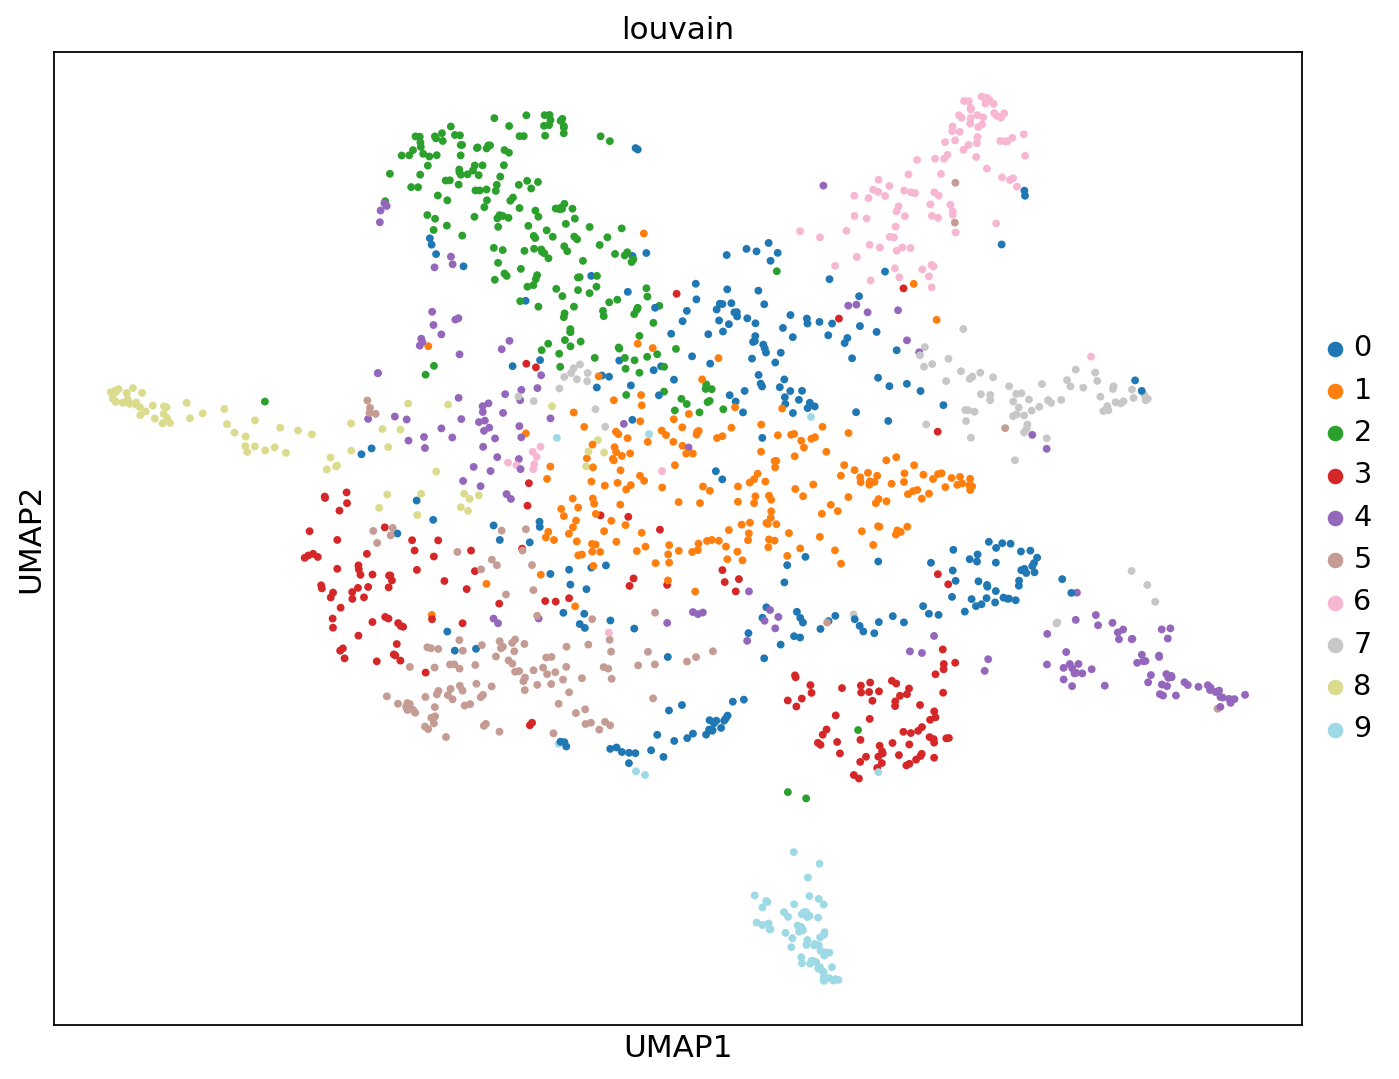

In [124]:
 plt.rcParams['figure.figsize'] = [10, 8]

# # sc.pl.umap(adata, 
# #            color=['louvain'], 
# #            groups=[str(1),str(2)],
# #            size=100,
# #            ncols=2,
# #            frameon=False
# #           )


sc.pl.umap(adata, 
           color=['louvain'],
           ncols=1,
           palette="tab20",# color_map=mpl.cm.Greys,#'mm10_Ctss','mm10_Tgfbi','mm10_Lyz2'],
           size=50)# 'mm10_Alb','mm10_Trf','mm10_Apoa1','mm10_Serpina1c'], ncols=2, frameon=False)

In [125]:
sc.tl.rank_genes_groups(adata, 'louvain')

ranking genes
    finished (0:00:00.20) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids


/Users/derekbogdanoff/projects/venv3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/derekbogdanoff/projects/venv3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/derekbogdanoff/projects/venv3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


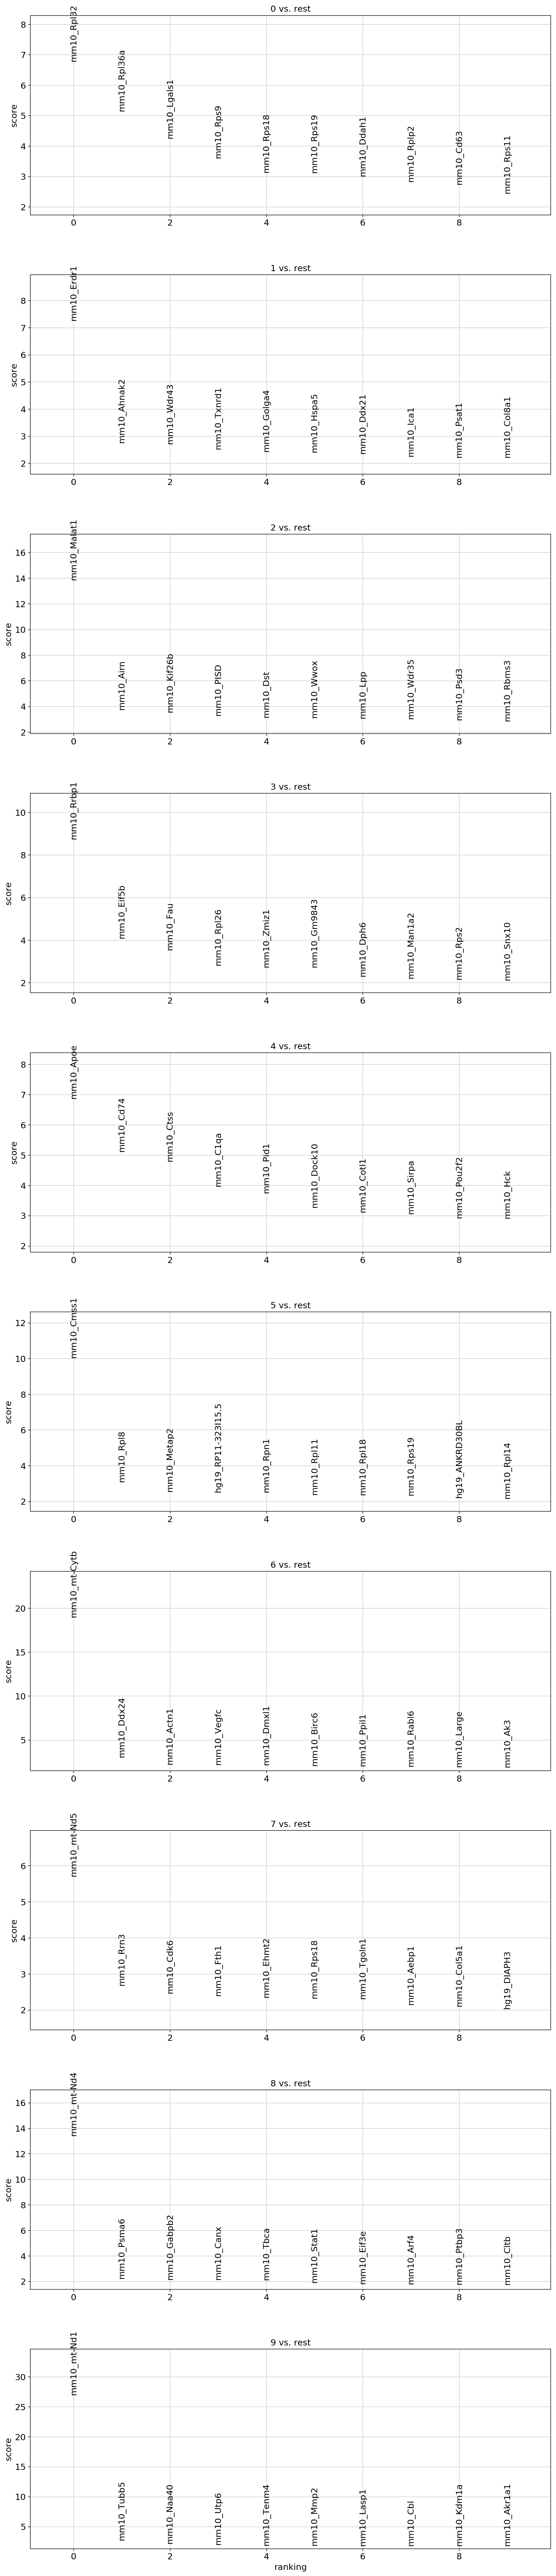

In [132]:
sc.pl.rank_genes_groups(adata, 
                        n_genes=10, 
                        #groups=[str(4)],
                        ncols=1,
                        fontsize=14,
                        sharey=False) 